In [68]:
import numpy as np
import scipy.io as io

from classifiers import load_data, CSPClassifier

In [69]:
FS = 250

## Load the data (real and fake)

In [70]:
# Load real data to create the CSP classifier skeleton
dataset = {}
mat_train, mat_test = load_data("../data/2b_iv", 1)
dataset[f"subject_{1}"] = {"train": mat_train, "test": mat_test}

In [76]:
# Load fake data

samples_zero = np.load("../data/generated_data/samples_zero.npy")
samples_one = np.load("../data/generated_data/samples_one.npy")

# Load training set
samples_train = np.concatenate([samples_zero[:40], samples_one[:40]], axis=0)
samples_train_labels = np.concatenate([np.zeros(40), np.ones(40)], axis=0)

# Shuffle the data
idx = np.random.permutation(len(samples_train))
samples_train = samples_train[idx]
samples_train_labels = samples_train_labels[idx]

# Load validation set
samples_val = np.concatenate([samples_zero[40:50], samples_one[40:50]], axis=0)
samples_val_labels = np.concatenate([np.zeros(10), np.ones(10)], axis=0)

# Shuffle the data
idx = np.random.permutation(len(samples_val))
samples_val = samples_val[idx]
samples_val_labels = samples_val_labels[idx]

## Create the classifier

In [71]:
# Create the CSP classifier
classifier = CSPClassifier(dataset, t_baseline=0.75, t_epoch=5.75)

In [63]:
# Set classifier data to the fake data

classifier.x_train = samples_train.astype(np.double)
classifier.y_train = samples_train_labels.astype(np.double)

classifier.x_val = samples_val.astype(np.double)
classifier.y_val = samples_val_labels.astype(np.double)

In [77]:
x, y = classifier.get_train()
# Since t_baseline is 0.75, set epoch to start at 3.5 and end at 5.5
classifier.set_epoch(2.75, 2)

In [73]:
selectkbest_params = {
	"selection__k":["all"]
}

svc_params = {
    'classification__C': [1, 10,100,1000], 
	"classification__kernel":["rbf"]
}

param_grid = {**svc_params,**selectkbest_params}

## Train and test the classifier

In [74]:
%%capture
classifier.fit()

train kappa score: 0.5671590518722089
train accuracy: 0.7839506172839507
[[0.74213836 0.25786164]
 [0.17575758 0.82424242]]


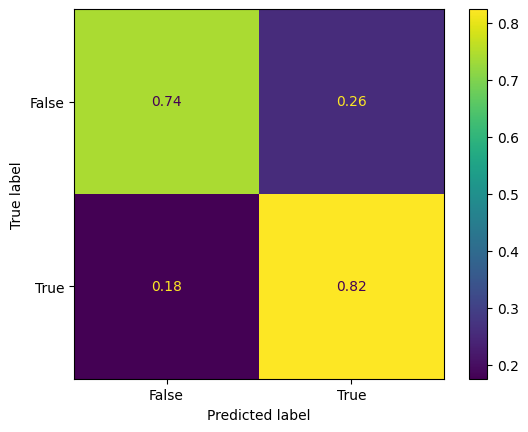

test kappa score: 0.15757062581787395
test accuracy: 0.5789473684210527
[[0.57798165 0.42201835]
 [0.42016807 0.57983193]]


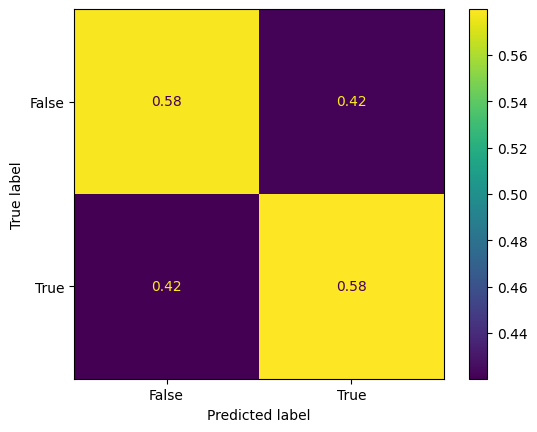

In [75]:
_ = classifier.test()